# Исследование объявлений о продаже квартир

## Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

---

<h2>Содержание</h2>

<div class="toc">
  <ul>
    <li><a href="#Изучение-данных">Изучение данных</a></li>
    <li><a href="#Предобработка-данных">Предобработка данных</a></li>
    <li><a href="#Расчеты-и-добавление-в-таблицу-новых-столбцов">Расчеты и добавление в таблицу новых столбцов</a></li>
    <li><a href="#Исследовательский-анализ-данных">Исследовательский анализ данных</a></li>
      <ul>
        <li><a href="#Изучение-параметров-обьектов">Изучение параметров обьектов</a></li>
        <li><a href="#Изучение-времени-продажи-квартиры">Изучение времени продажи квартиры</a></li>
        <li><a href="#Факторы-больше-всего-влияющие-на-общую-(полную)-стоимость объекта">Факторы больше всего влияющие на общую (полную) стоимость объекта</a></li>
        <li><a href="#Сравнение-средней-стоимости-квадратного-метра-в-топ-10-городов-по-обьявлениям">Сравнение средней стоимости квадратного метра в топ-10 городов по обьявлениям</a></li>
        <li><a href="#Зависимость-стоимости-обьекта-от-расстояния-до-центра-города">Зависимость стоимости обьекта от расстояния до центра города</a></li>
      </ul>
    <li><a href="#Общий-вывод">Общий вывод</a></li>
  </ul>
</div>

<style>
  .toc ul {
    font-size: 14px;
  }
</style>

Зависимость стоимости обьекта от расстояния до центра города

---

### Цели и задачи

**Цель** - Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Задачи**:
    
    1. Загрузить и осмотреть данные.
    
    2. Предобработать данные.
        2.1 Обработать пропуски.
        2.2 Рассмотритеть типы данных в каждом столбце.
        2.3 Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.
        2.4 Обработать аномалии.
        
    3. Провести исследовательский анализ.
        3.1 Изучить следующие параметры объектов:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления.
        3.2 Изучить, как быстро продавались квартиры.
        3.3 Рассмотреть, какие факторы больше всего влияют на общую (полную) стоимость объекта;
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количества комнат;
        - этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год).
        3.4 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
        3.5 Вычислить среднюю цену каждого километра квартир в Санкт-Петербурге.
        
    4. Сделать выводы по итогам работы. 
    
---
    
### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

---

## Изучение данных

In [1]:
import pandas as pd ###Выводим все, знакомимся с данными
import matplotlib.pyplot as plt

data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

display(data.head())

data.info()

print('\nЧисло дубликатов:', data.duplicated().sum())

data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


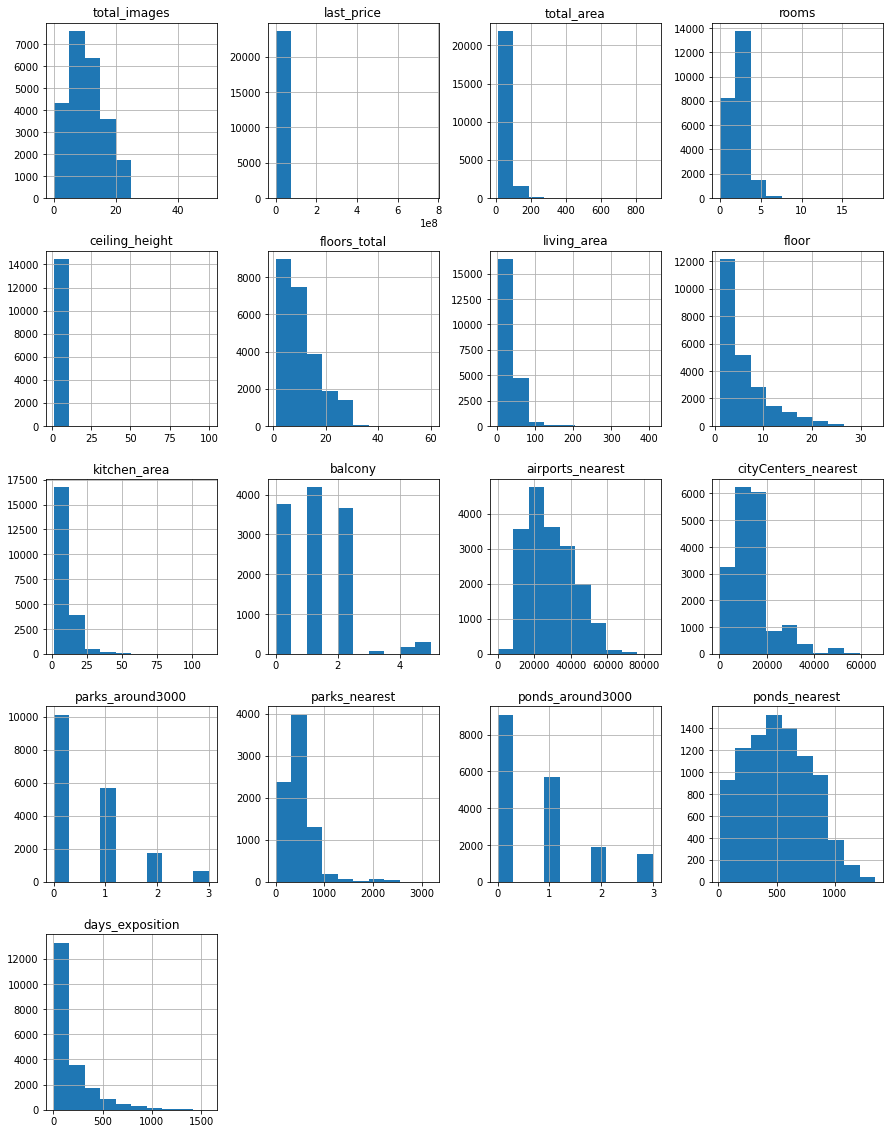

In [2]:
data.hist(figsize=(15, 20));

### Вывод

Всего 23699 записи. Для ряда столбцов есть пропущенные значения и некорректный тип данных.

## Предобработка данных

In [3]:
# Проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#data["is_apartment"].sum() #Всего аппартаментов 50, заменяем пропущенные значения на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

# Удаляем записи, где отсутствует локация и этажность, так как мы не можем предположить их значения  
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Приводим в целочисленный тип стоимость квартиры и этажность. 
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

#data['ceiling_height'].unique()#мне кажется, что высота меньше 2м и больше 10м аномальные, поэтому я изменяю эти значения
data = data[(data['ceiling_height'] >= 2.1) & (data['ceiling_height'] <= 10)]

# Заменяем пустые значения высоты потолков на медианное значение по всему датасету
#data['ceiling_height'].unique() #здесь есть аномальные значения такие как 1м или 100м
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

#Так же количество балконов, парков и прудов(пропущенные значения заменяем на 0)
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

#Заменяем пропуски на 0
data['airports_nearest'] = data['airports_nearest'].fillna(value=0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=0)
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)

# Заменяем пустые значения жилой площади и площади кухни, в соотношеннии кухни и жилой площади к общей площади
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

#data['living_area'].unique()#Минимальный размер жилого помещения по законодательству — пять квадратных метров.
data = data[(data["living_area"] >= 5)]

#days_exposition  - пропуски скорее всего значат, что публикация до сих пор висит, поэтому устанавливаю
#9999(дн) для пропусков в сроке продажи и привожу к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

# Смотрим количество пропущенных значений
data.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [5]:
#Сортирую и меняю неявный дубликат, которые нашел
data["locality_name"]= data["locality_name"].str.replace("посёлок", "поселок", case = False)
data["locality_name"]= data["locality_name"].str.replace("поселок городского типа", "поселок", case = False)
data["locality_name"]= data["locality_name"].str.replace("поселок при железнодорожной станции", "поселок", case = False)
data["locality_name"]= data["locality_name"].str.replace("коттеджный поселок", "поселок", case = False)
data["locality_name"]= data["locality_name"].str.replace("городской поселок", "поселок", case = False)
data["locality_name"]= data["locality_name"].str.replace("поселок станции", "поселок", case = False)
data.sort_values("locality_name", inplace=True)
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Батово', 'деревня Бегуницы',
       'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Бор', 'деревня Борисова Грива', 'деревня Ваганово',
       'деревня Вартемяги', 'деревня Вахнова Кара', 'деревня Гарболово',
       'деревня Глинка', 'деревня Горбунки', 'деревня Гостилицы',
    

### Вывод

Пропуски могли возникнуть по разным причинам, техническим или сыграл человеческий фактор
* В days_exposition  - пропуски скорее всего значат, что публикация до сих пор висит
* В is_apartment - так как аппаптаментов мало, скорее всего их просто не отметели,что они не являются ими
* В balcony, parks_around3000, ponds_around3000, - здесь пропуски, скорее всего, говорят что их просто нет (балкона или парка рядом) 
* В пропусках связанных с площадью помещения нет пропусков в "Общей площади", зато есть в "Жилой и Кухни", вероятно продавец сознательно не стал указывать площадь отдельных комнат 

## Расчеты и добавление в таблицу новых столбцов

In [6]:
# Добавляем столбец со стоимостью квадратного метра (m2_price) и приводим его в целочисленный тип
data['m2_price'] = data['last_price'] / data['total_area']
data['m2_price'] = data['m2_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Функция для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Добавляем столбец со расстояние до центра города в км (cityCenters_nearest_km)
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
#перевожу в тип в int, так как без него в последнем задании каша получается
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(value=0).astype(int)

### Вывод

Добавил следующие столбцы: 
* Стоимость квадратного метра (m2_price)
* День(weekday), месяц(month), год публикации(year)
* Тип этажа (floor_type)
* Расстояние до центра города в километрах (cityCenters_nearest_km)

## Исследовательский анализ данных

### Изучение параметров обьектов

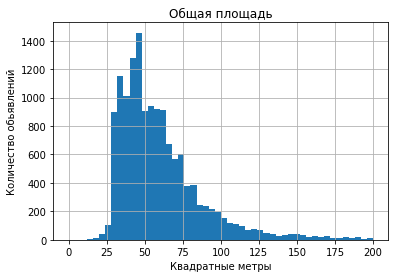

In [7]:
# Работаем с общей площадью
plt.hist(data['total_area'], bins=50, range=(0,200))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Общая площадь
В основном квартиры в обьявлениях от 25 до 100 квадратных метров. В датасете есть несколько вариантов площадью больше 100 кв.м.

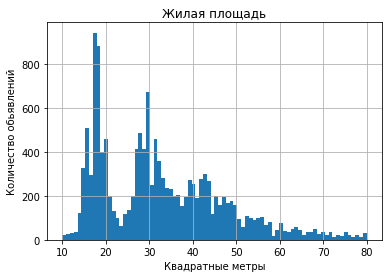

In [8]:
plt.hist(data['living_area'], bins=80, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Жилая площадь
Жилая площадь в обьявлениях в основном от 15 до 50 квадратных метров. Есть две вершины, возможно это 1 и 2-комнатные квартиры, тогда еще одну вершину (находится около 45 кв.м) можно считать 3-комнатные квартирой

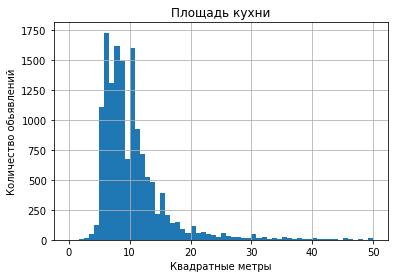

In [9]:
plt.hist(data['kitchen_area'], bins=60, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Площадь кухни
Распростренная площадь кухни 5-15 кв.м. площадь больше стандартной встречается редко

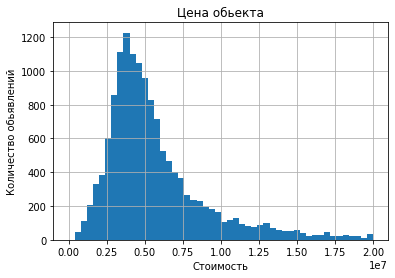

In [10]:
plt.hist(data['last_price'], bins=50, range=(0,20000000))
plt.title('Цена обьекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Цена объекта
Большинство квартир стоит около 5 миллионов, но основная масса обьявлений до 10 миллионов

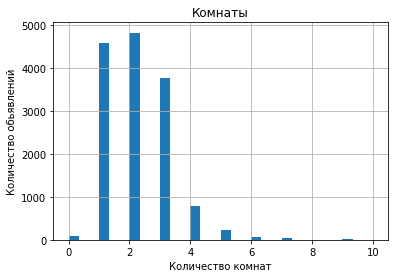

In [11]:
plt.hist(data['rooms'], bins=30, range=(0,10))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Количество комнат
Основное количество комнат в квартирах 1, 2 и 3. Остальные встречаются достаточно редко

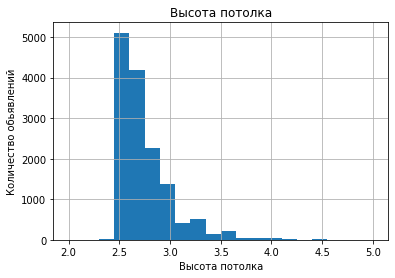

In [12]:
plt.hist(data['ceiling_height'], bins=20, range=(2,5))
plt.title('Высота потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Высота потолка
В основном высота потолка от 2,5 до 3 метров, высота больше этого стандарта встречается редко

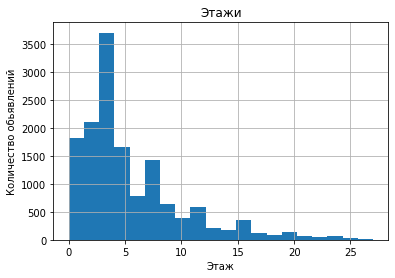

In [13]:
plt.hist(data['floor'], bins=20, range=(0,27))
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Этаж квартиры
Большинство квартир находится до 10 этажа, что интересно 4 этаж самый частый в обьявлениях, остальные встречаются не так часто

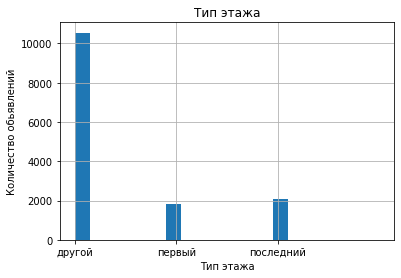

In [14]:
plt.hist(data['floor_type'], bins=20, range=(0,3))
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Тип этажа квартиры
Большинство квартир в обьявлении это не первый и последний этаж

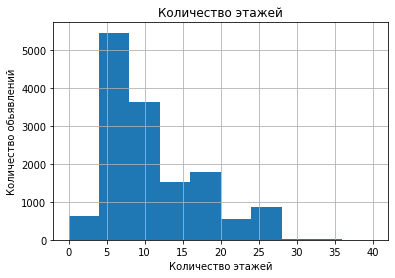

In [15]:
plt.hist(data['floors_total'], bins=10, range=(0,40))
plt.title('Количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Общее количество этажей в доме
Количество этажей в домах в основном 4 до 20 этажей, остальные случаи встречаются меньше.

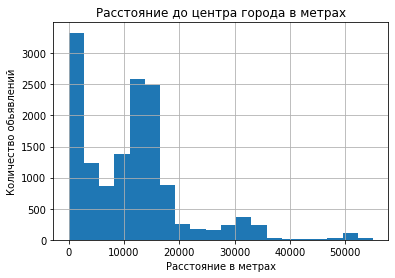

In [16]:
plt.hist(data['cityCenters_nearest'], bins=20, range=(0,55000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Расстояние до центра города в метрах
Большинство квартир находится до 15-16 км до центра, так же много квартир находится в самом центре

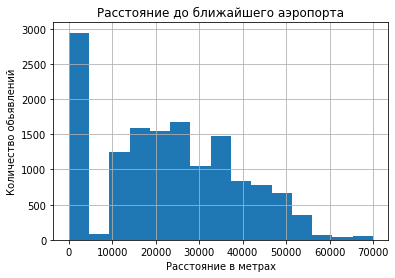

In [17]:
plt.hist(data['airports_nearest'], bins=15, range=(0,70000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Расстояние до ближайшего аэропорта
В основном расстояние от квартир до аэропорта от 10 км до 50 км. Те значения что около 0 вероятно это пропуски которые я заполнил нулем

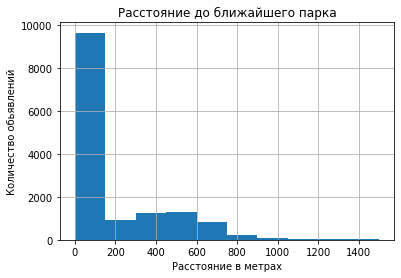

In [18]:
plt.hist(data['parks_nearest'], bins=10, range=(0,1500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### Расстояние до ближайшего парка
Парки находятся в основном на растоянии до 180 метров

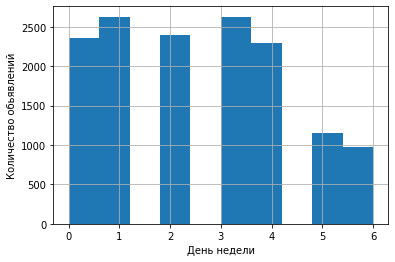

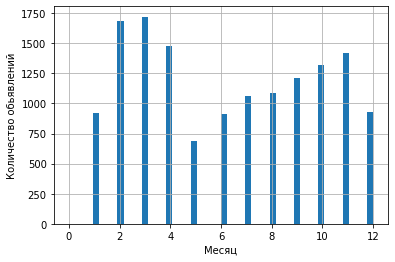

In [19]:
plt.hist(data['weekday'], bins=10, range=(0,6))
plt.xlabel('День недели')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

plt.hist(data['month'], bins=50, range=(0,12))
plt.xlabel('Месяц')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

### День и месяц публикации объявления
Наиболее часто обьявления публикуются в буднии дни. Начиная с мая количество обьявлений увеличивается до декабря, наибоольшее количество публикуется с ферваля по апрель

### Изучение времени продажи квартиры

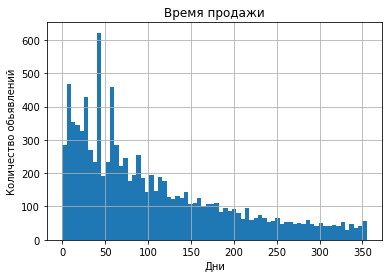

Время продажи (медиана): 103 

Время продажи (среднее): 190 



count    11999.000000
mean       190.395366
std        228.685455
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [20]:
# Строю гистограмму и исключаю из нее не закрытые публикации
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=70, range=(0,355))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество обьявлений')
plt.grid(True)
plt.show()

# Вывожу среднюю и медиану, исключая не закрытые публикации
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')

# Вывожу распределение значений
data.query('days_exposition != 9999')['days_exposition'].describe()

### Вывод
* В среднем продажа квартиры занимает около 100 дней. 
Быстрой можно считать продажу в течении 45 дней и меньше. 
Долгая продажа 250 дней(около 8 месяцев) и более. 
* На графике есть выбивающиеся значения, вероятно, в эти дни сайт убирает с показа бесплатные объявления.

### Факторы больше всего влияющие на общую (полную) стоимость объекта

Корреляция цены и площади: 

            last_price  total_area
last_price     1.00000     0.93858
total_area     0.93858     1.00000 



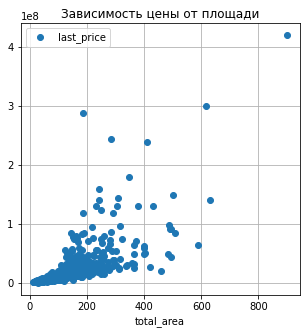

In [20]:
# Зависимость цены от площади
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади')
plt.show()

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.762769
living_area    0.762769     1.000000 



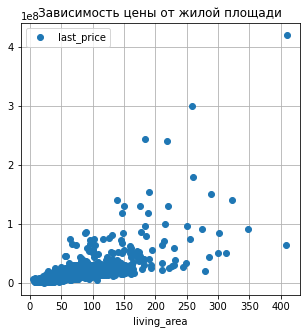

In [21]:
# Зависимость цены от жилой площади
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.754159
last_price        0.754159    1.000000 



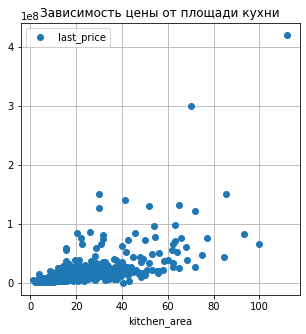

In [22]:
# Зависимость цены от площади кухни
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

* Исходя из корреляции площадь играет значительную роль в формировании цены, причем важна именно общая площадь помещений

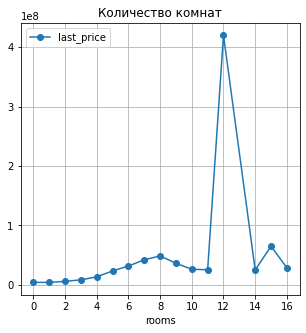

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.462194
rooms         0.462194  1.000000 



In [23]:
# Количество комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Количество комнат')
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

* В целом есть небольшая зависимость цены от количества комнат, чем их больше, тем дороже. 
* На значении 12 комнат какое-то аномальное значение, сложно предположить с чем оно связано

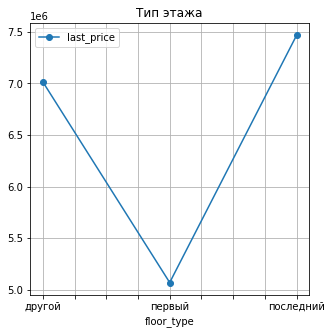

In [24]:
# тип этажа
(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Тип этажа')
plt.show()

* Первый этаж самый дешевый, последний этаж самый дорогой

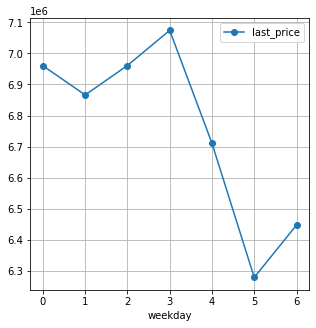

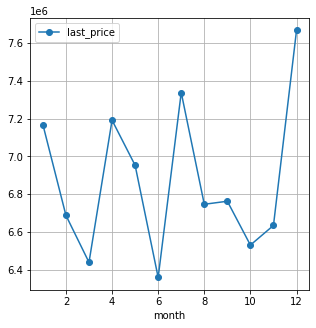

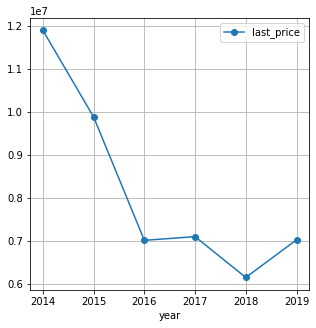

In [26]:
# день недели
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# месяц
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# год
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

* День недели: самые дорогие квартиры опубликованные в четверг, самые дешевые в субботу
* Месяц: дорогие квартиры публикуются в декабре, самые дешевые июне
* Год: с 2014 до 2018 года цены на квартиры падали, начиная с 2019 цены снова стали повышаться

### Вывод
Площадь значительно влияет на стоимость квартиры. Корреляция этих значений достаточно высокая. Количество комнат тоже влияет на стоимость, но значительно меньше площади.


### Сравнение средней стоимости квадратного метра в топ-10 городов по обьявлениям

In [27]:
# Сравниваю среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
top_ten_city = data['locality_name'].value_counts().head(10)
top_city_m2_price = data.query('locality_name in (@top_ten_city.index)').pivot_table(values='m2_price', index='locality_name')
top_city_m2_price = top_city_m2_price.astype(int)
top_city_m2_price.sort_values('m2_price', ascending=False)

,m2_price
locality_name,
Санкт-Петербург,115641
Пушкин,103920
Сестрорецк,102266
поселок Парголово,90900
поселок Мурино,87085
Петергоф,85553
поселок Шушары,79286
Колпино,75938
Гатчина,70024


### Вывод
Наибольшее количество обьявлений в Санкт-Петербурге, затем следуют город Пушкин и Сестрорецк. Исходя из остальных топ населенных пунктов, могу предположить, что большинство обьявлений находится в рамках административно-территориального деления Санкт-Петербурга. К примеру Всеволожск не входит в административную-территорию города Санкт-Петербурга, и обьявления у него почти в 2 раза меньше Питера.

### Зависимость стоимости обьекта от расстояния до центра города

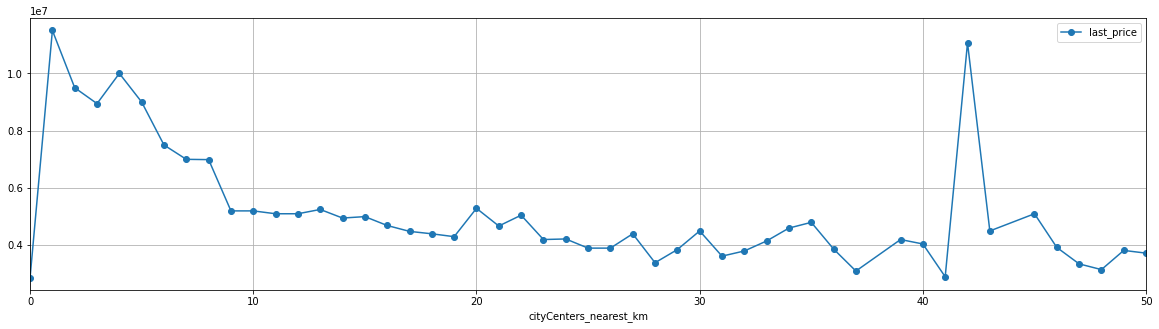

In [25]:
# Смотрою на график, где указана средняя стоимость для каждого км до центра Санкт-Петербурга
(
    data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', xlim=(0 ,50), figsize=(20, 5))
    
)
plt.show()

### Вывод
До 5 км от центра можно считать самым дорогим жильем, на 5-8 км цены значительно снижаются, от 8 км и более цены на квартиры падают в 2 раза по сравнению с центром

## Общий вывод

Факторы влияющие на стоимость квартиры
* Общая площадь квартиры значительно влияет на ее стоимость, число комнат оказывает меньшее влияние на цену.
* Первый этаж продается обычно значительно дешевле остальных, последний же этаж немного дороже.

Срок продажи квартиры
* В среднем продажа квартиры занимает около 100 дней. 
* Быстрой можно считать продажу в течении 45 дней и меньше. 
* Долгая продажа 250 дней(около 8 месяцев) и более.

Стоимость квадратного метра в топ-10 городов по обьявлениям
* Дороже всего в Санкт-Петербурге
* Дешевле вне административной-территории города Санкт-Петербурга, например Всеволожск

Зависимость стоимости обьекта от расстояния до центра города
* В центре самая дорогая недвижимость
* Чем дальше дальше удаляясь от центра, тем больше она дешевеет, причем за пределы города цены дешевле в 2 раза